## 南極ドームふじ　2023/11-2024/2　MERRA-2 Reanalysis

水混合比、オゾン混合比、大気温度の各大気圧ごとの鉛直分布のプロット

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

オゾンの混合比（ドームふじ：夏期）

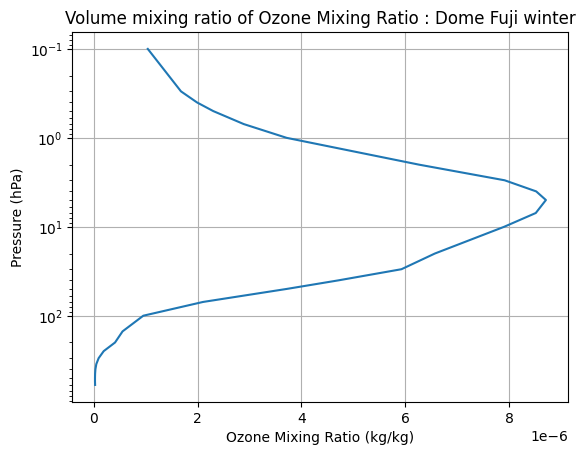

In [5]:
# netCDFファイルを開く
nc_file = 'netCDF_file/g4.curtainLatitude.M2IMNPASM_5_12_4_O3.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset = Dataset(nc_file, 'r')

# データ変数を取得
o3_data = nc_dataset.variables['M2IMNPASM_5_12_4_O3']  # オゾン混合比のデータ
lev_data = nc_dataset.variables['lev']  # 気圧のデータ
lev_data_hPa = lev_data[:]

plt.semilogy(o3_data[:, 0], lev_data_hPa)
plt.xlabel('Ozone Mixing Ratio (kg/kg)')
plt.ylabel('Pressure (hPa)')
plt.title('Volume mixing ratio of Ozone Mixing Ratio : Dome Fuji winter')
plt.gca().invert_yaxis()  # y軸を反転して気圧が下に向かうようにする
plt.grid(True)
plt.show()

nc_dataset.close()


水の混合比（ドームふじ：夏期）

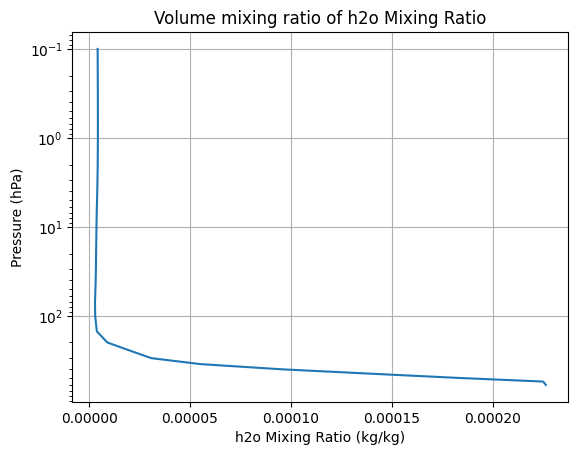

In [6]:
nc_file = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_QV.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset = Dataset(nc_file, 'r')

h2o_data = nc_dataset.variables['M2I3NPASM_5_12_4_QV']  # h2oのデータ
lev_data = nc_dataset.variables['lev']  # 気圧のデータ
lev_data_hPa = lev_data[:]

plt.semilogy(h2o_data[:, 0], lev_data_hPa)
plt.xlabel('h2o Mixing Ratio (kg/kg)')
plt.ylabel('Pressure (hPa)')
plt.title('Volume mixing ratio of h2o Mixing Ratio')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

nc_dataset.close()

大気の温度

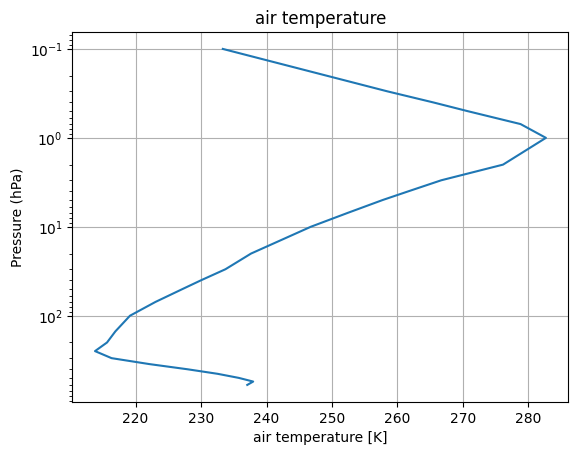

In [8]:
nc_file = 'netCDF_file/g4.curtainLatitude.M2IMNPASM_5_12_4_T.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset = Dataset(nc_file, 'r')

h2o_data = nc_dataset.variables['M2IMNPASM_5_12_4_T']  # temperature
lev_data = nc_dataset.variables['lev'] 

lev_data_hPa = lev_data[:]

plt.semilogy(h2o_data[:, 0], lev_data_hPa)
plt.xlabel('air temperature [K]')
plt.ylabel('Pressure (hPa)')
plt.title('air temperature')
plt.gca().invert_yaxis() 
plt.grid(True)
plt.show()

nc_dataset.close()

各気圧ごとのオゾン、水混合比、大気温度をまとめてプロット

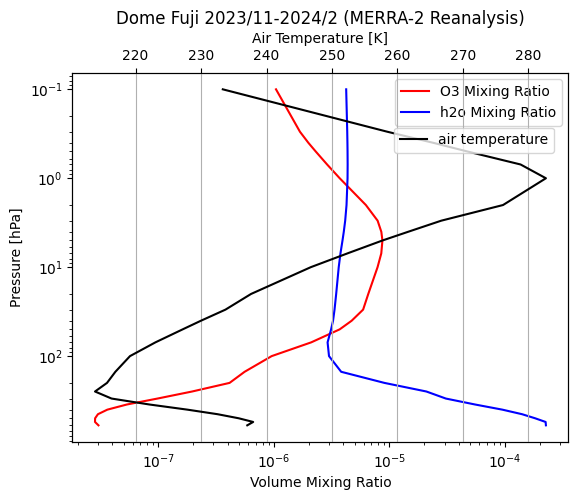

In [9]:
# o3
nc_file_o3 = 'netCDF_file/g4.curtainLatitude.M2IMNPASM_5_12_4_O3.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset_o3 = Dataset(nc_file_o3, 'r')
o3_data = nc_dataset_o3.variables['M2IMNPASM_5_12_4_O3']
lev_data = nc_dataset_o3.variables['lev']
lev_data_hPa = lev_data[:] 
plt.loglog(o3_data[:, 0], lev_data_hPa, color ="r", label='O3 Mixing Ratio')
plt.ylabel("Pressure [hPa]")
plt.legend()
nc_dataset_o3.close()

# h2o
nc_file_h2o = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_QV.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset_h2o = Dataset(nc_file_h2o, 'r')
h2o_data = nc_dataset_h2o.variables['M2I3NPASM_5_12_4_QV']
plt.loglog(h2o_data[:, 0], lev_data_hPa, color ="b",  label='h2o Mixing Ratio')
plt.xlabel("Volume Mixing Ratio")
plt.legend()

# air temperature
nc_file_temp = 'netCDF_file/g4.curtainLatitude.M2IMNPASM_5_12_4_T.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset_temp = Dataset(nc_file_temp, 'r')
temp_data = nc_dataset_temp.variables['M2IMNPASM_5_12_4_T']
ax1 = plt.gca().twiny() 
ax1.semilogy(temp_data[:, 0], lev_data_hPa, color ="black",  label='air temperature')
ax1.set_xlabel('Air Temperature [K]')
ax1.xaxis.set_label_position('top') 
ax1.legend(loc='upper right', bbox_to_anchor=(0.985, 0.87), ncol=2)
plt.title('Dome Fuji 2023/11-2024/2 (MERRA-2 Reanalysis)')
plt.gca().invert_yaxis()  # y軸を反転して気圧が下に向かうようにする
plt.grid(True)

plt.show()


In [10]:
# 大気圧[hPa]を入力して、air_temperature, o3, h2oを取得

from scipy.interpolate import interp1d

a = 600 # 大気圧を入力
print(a)

# h2o
nc_file_h2o = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_QV.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset_h2o = Dataset(nc_file_h2o, 'r')
h2o_data = nc_dataset_h2o.variables['M2I3NPASM_5_12_4_QV']
f_1d_h2o = interp1d(lev_data_hPa, h2o_data[:, 0])
h2o = f_1d_h2o(a)
print("{:.3g}".format(float(h2o)))

# o3
nc_file_o3 = 'netCDF_file/g4.curtainLatitude.M2IMNPASM_5_12_4_O3.20231101-20240229.39E_77S_40E_76S.nc'
nc_dataset_o3 = Dataset(nc_file_o3, 'r')
o3_data = nc_dataset_o3.variables['M2IMNPASM_5_12_4_O3']
lev_data = nc_dataset_o3.variables['lev']
f_1d = interp1d(lev_data_hPa, o3_data[:, 0])
o3 = f_1d(a)
print("{:.3g}".format(float(o3)))

f_1d_temp = interp1d(lev_data_hPa, temp_data[:, 0])
temp = f_1d_temp(a)
print(round(float(temp),1))

600
0.000226
3.03e-08
237.1


# 南極ドームふじ　2023/7-2023/9　MERRA-2 Reanalysis

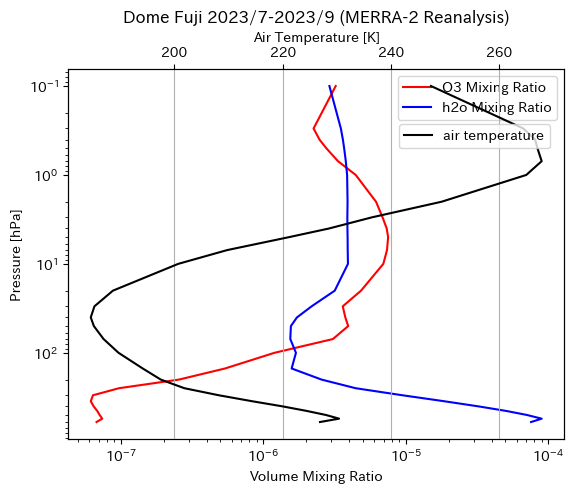

In [12]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib

# o3
nc_file_o3 = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_O3.20230702-20230930.39E_77S_40E_76S.nc'
nc_dataset_o3 = Dataset(nc_file_o3, 'r')
o3_data = nc_dataset_o3.variables['M2I3NPASM_5_12_4_O3']
lev_data = nc_dataset_o3.variables['lev']
lev_data_hPa = lev_data[:] 
plt.loglog(o3_data[:, 0], lev_data_hPa, color ="r", label='O3 Mixing Ratio')
plt.ylabel("Pressure [hPa]")
plt.legend()
nc_dataset_o3.close()

# h2o
nc_file_h2o = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_QV.20230702-20230930.39E_77S_40E_76S.nc'
nc_dataset_h2o = Dataset(nc_file_h2o, 'r')
h2o_data = nc_dataset_h2o.variables['M2I3NPASM_5_12_4_QV']
plt.loglog(h2o_data[:, 0], lev_data_hPa, color ="b",  label='h2o Mixing Ratio')
plt.xlabel("Volume Mixing Ratio")
plt.legend()

# air temperature
nc_file_temp = 'netCDF_file/g4.curtainLatitude.M2I3NPASM_5_12_4_T.20230702-20230930.39E_77S_40E_76S.nc'
nc_dataset_temp = Dataset(nc_file_temp, 'r')
temp_data = nc_dataset_temp.variables['M2I3NPASM_5_12_4_T']
ax1 = plt.gca().twiny() 
ax1.semilogy(temp_data[:, 0], lev_data_hPa, color ="black",  label='air temperature')
ax1.set_xlabel('Air Temperature [K]')
ax1.xaxis.set_label_position('top') 
ax1.legend(loc='upper right', bbox_to_anchor=(0.985, 0.87), ncol=2)
plt.title('Dome Fuji 2023/7-2023/9 (MERRA-2 Reanalysis)')
plt.gca().invert_yaxis()  # y軸を反転して気圧が下に向かうようにする
plt.grid(True)

plt.show()


# .outファイルのプロット

### 大気透過率シミュレーション

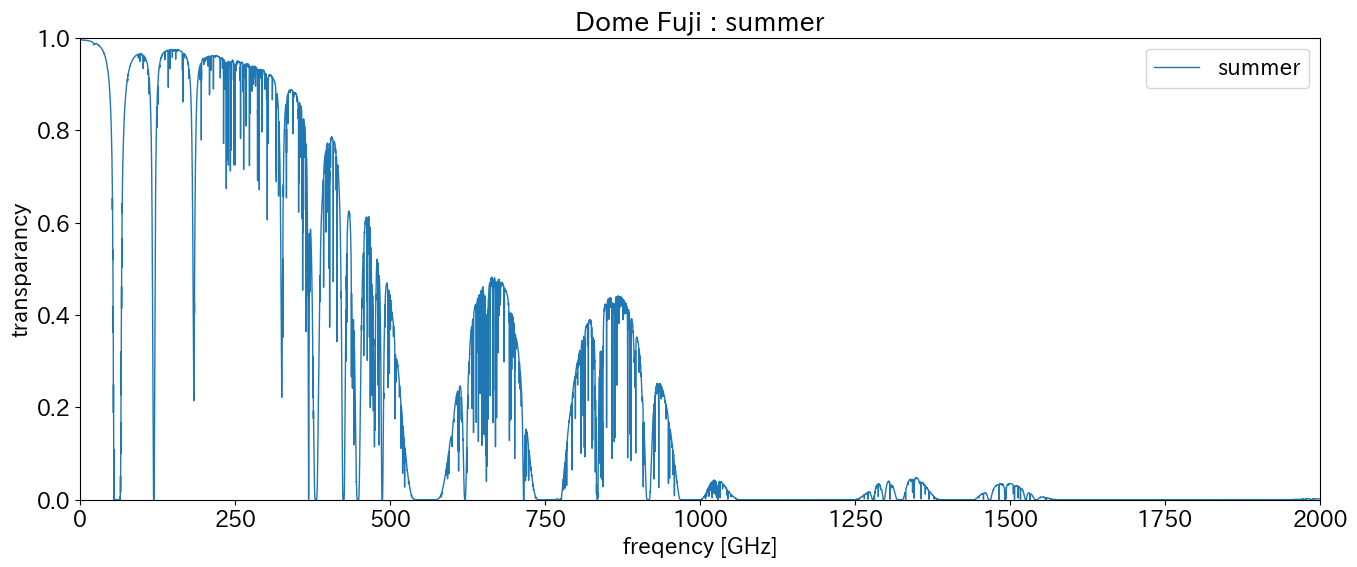

In [14]:
import pandas as pd

data = pd.read_csv(r"output_file/DomeFuji_summer_50.out",
                   header=None, names=["freq","trans","A"],delimiter='\s+', dtype=float)

plt.figure(figsize=(16, 6))
plt.rcParams["font.size"] = 16
plt.plot(data["freq"], data["trans"], marker="",lw = 1, label="summer")
plt.ylim(0,1)
plt.xlim(0,2000)
plt.xlabel("freqency [GHz]")
plt.ylabel("transparancy")
plt.title("Dome Fuji : summer") 
plt.legend()

In [ ]:
# ドームふじ夏季 出力結果
# total (27 layers):
#                  dry_air  1.272032e+25       1.272032e+25
#                      h2o  1.148897e+21       1.148897e+21
#                            (343.703 um_pwv)   (343.703 um_pwv)
#                       o3  1.001815e+19       1.001815e+19
#                            (372.865 DU)       (372.865 DU)

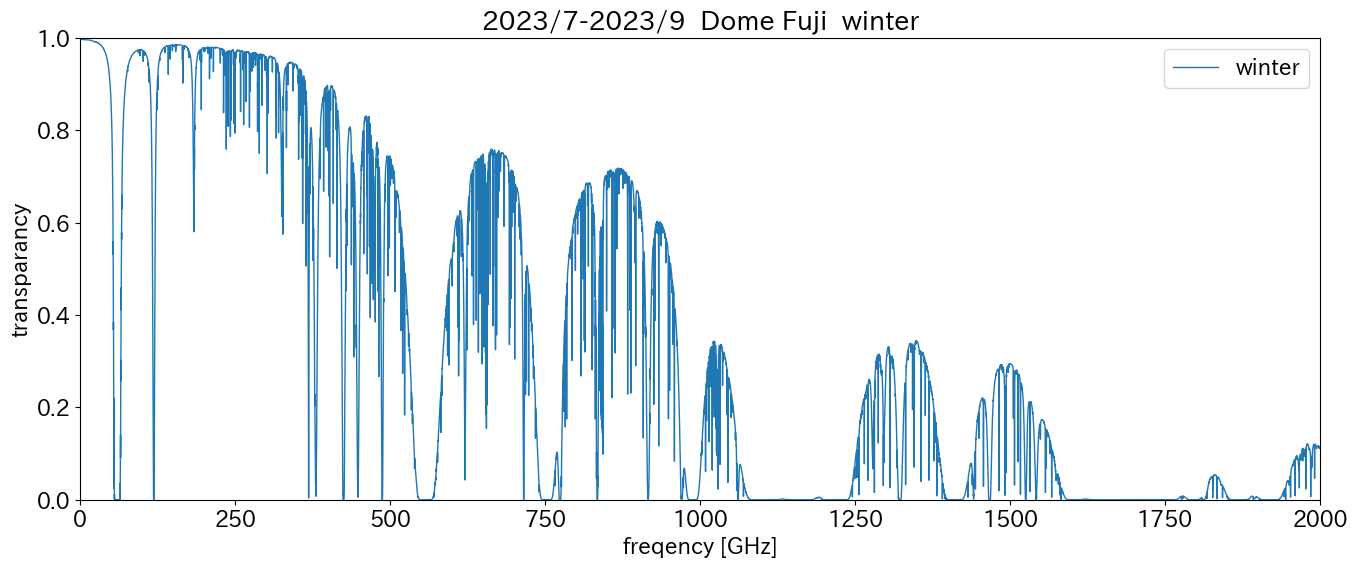

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

data = pd.read_csv(r"output_file/DomeFuji_winter_MERRA2_2.out",
                   header=None, names=["freq","trans","A"],delimiter='\s+', dtype=float)

plt.figure(figsize=(16, 6))
plt.rcParams["font.size"] = 16
plt.plot(data["freq"], data["trans"], marker="",lw = 1, label="winter")
plt.ylim(0,1)
plt.xlim(0,2000)
plt.xlabel("freqency [GHz]")
plt.ylabel("transparancy")
plt.title("2023/7-2023/9  Dome Fuji  winter") 
plt.legend()

In [ ]:
# am出力結果
# total (27 layers):
#                  dry_air  1.272076e+25       1.272076e+25
#                      h2o  4.488501e+20       4.488501e+20
#                            (134.278 um_pwv)   (134.278 um_pwv)
#                       o3  7.677070e+18       7.677070e+18
#                            (285.733 DU)       (285.733 DU)
#

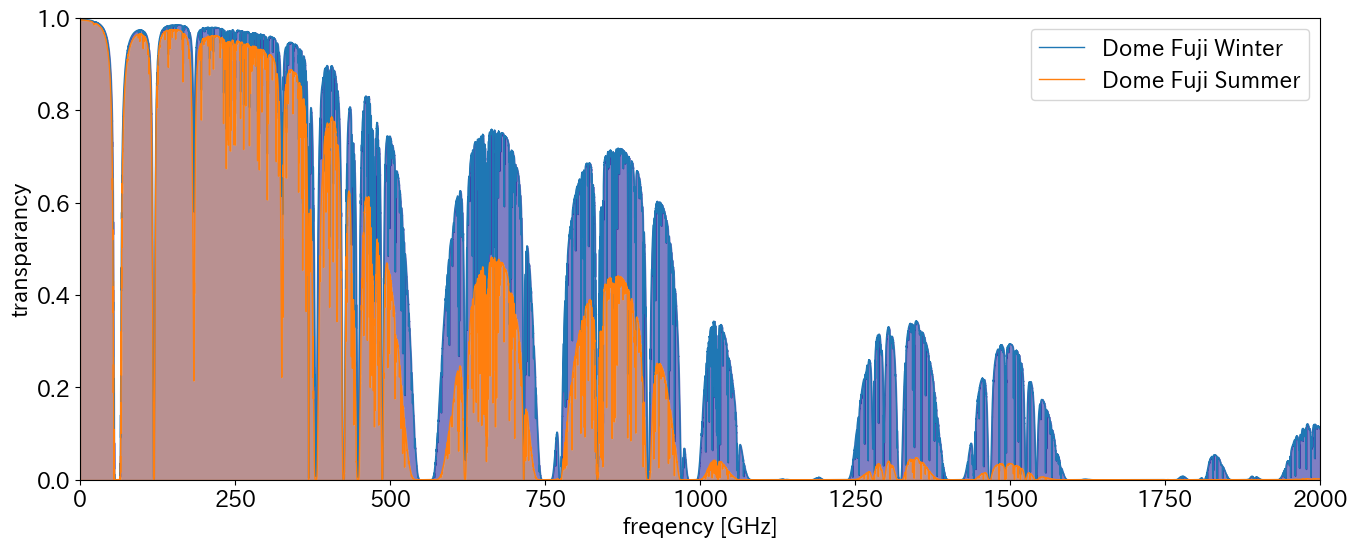

In [18]:
# ドームふじ夏期と冬季を重ねてプロット 

data_1 = pd.read_csv(r"output_file/DomeFuji_winter_MERRA2_2.out",
                   header=None, names=["freq","trans","A"],delimiter='\s+', dtype=float)
data_2 = pd.read_csv(r"output_file/DomeFuji_summer_50.out",
                   header=None, names=["freq","trans","A"],delimiter='\s+', dtype=float)

plt.figure(figsize=(16, 6))
plt.rcParams["font.size"] = 16

plt.plot(data_1["freq"], data_1["trans"], marker="",lw = 1, label="Dome Fuji Winter")
plt.plot(data_2["freq"], data_2["trans"], marker="",lw = 1, label="Dome Fuji Summer")

# 各データセットの最小値を取得
min_transparency = min(data_1["trans"].min(), data_2["trans"].min())

# 最小値までの領域を塗りつぶす
plt.fill_between(data_1["freq"], min_transparency, data_1["trans"], alpha=0.5, color='darkblue')
plt.fill_between(data_2["freq"], min_transparency, data_2["trans"], alpha=0.5, color='sandybrown')
plt.xlabel("freqency [GHz]")
plt.ylabel("transparancy")
plt.ylim(0,1)
plt.xlim(0,2000)
#plt.title("") 
plt.legend()